Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5560 - loss: 0.7204 - val_accuracy: 0.9298 - val_loss: 0.4149
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7835 - loss: 0.4849 - val_accuracy: 0.9561 - val_loss: 0.2868
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8716 - loss: 0.3722 - val_accuracy: 0.9561 - val_loss: 0.2064
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8852 - loss: 0.3226 - val_accuracy: 0.9649 - val_loss: 0.1581
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9003 - loss: 0.2598 - val_accuracy: 0.9649 - val_loss: 0.1291
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9456 - loss: 0.2020 - val_accuracy: 0.9649 - val_loss: 0.1116
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9340 - loss: 0.1699 - val_accuracy: 0.9649 - val_loss: 0.0984
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9352 - loss: 0.1910 - val_accuracy: 0.9649 - val_loss: 0.0

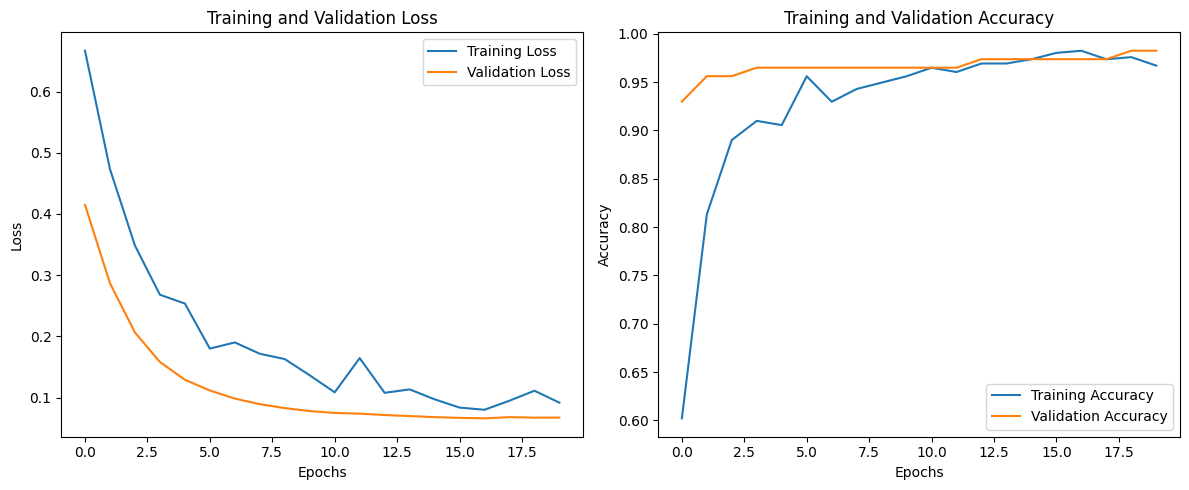

In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))


axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - classification_accuracy: 0.7586 - loss: 221.0480 - regression_mae: 14.3979 - val_classification_accuracy: 0.7895 - val_loss: 191.8555 - val_regression_mae: 13.4197
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - classification_accuracy: 0.8409 - loss: 179.1161 - regression_mae: 13.0127 - val_classification_accuracy: 0.8684 - val_loss: 149.9370 - val_regression_mae: 11.8967
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - classification_accuracy: 0.8409 - loss: 132.2795 - regression_mae: 11.1254 - val_classification_accuracy: 0.8860 - val_loss: 104.4671 - val_regression_mae: 9.8533
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - classification_accuracy: 0.8477 - loss: 93.0624 - regression_mae: 9.1399 - val_classification_accuracy: 0.8860 - val_loss: 57.6718 - val_regression_mae: 7.0169
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - classification_accuracy: 0.8563 - loss: 49.8816 - regression_mae: 6.2711 - val_classific

KeyError: 'accuracy'

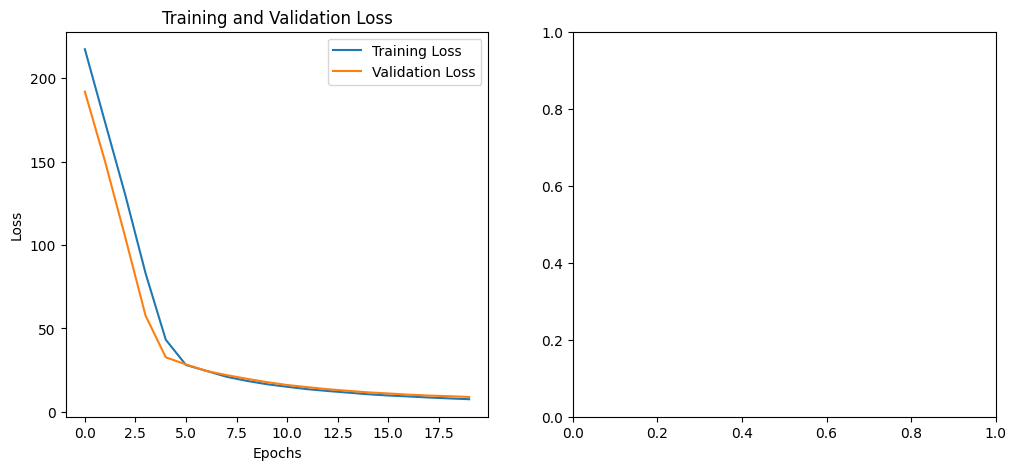

In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y_class = data.target
y_reg = data.data[:, 0]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    X_scaled, y_class, y_reg, test_size=0.2, random_state=42
)

input_layer = layers.Input(shape=(X_train.shape[1],))
x = layers.Dense(64, activation='relu')(input_layer)
x = layers.Dense(32, activation='relu')(x)

task1_output = layers.Dense(1, activation='sigmoid', name='classification')(x)

task2_output = layers.Dense(1, name='regression')(x)

model = models.Model(inputs=input_layer, outputs=[task1_output, task2_output])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy', 'mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, {'classification': y_class_train, 'regression': y_reg_train},
                    epochs=20, validation_data=(X_test, {'classification': y_class_test, 'regression': y_reg_test}),
                    callbacks=[early_stopping])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['mae'], label='Training MAE')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
axs[1].plot(history.history['val_mae'], label='Validation MAE', linestyle='--')
axs[1].set_title('Training and Validation Accuracy/MAE')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy/MAE')
axs[1].legend()

plt.tight_layout()
plt.show()


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - classification_accuracy: 0.3208 - loss: 197.1544 - regression_mae: 13.6234 - val_classification_accuracy: 0.2281 - val_loss: 169.6445 - val_regression_mae: 12.5721
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - classification_accuracy: 0.2602 - loss: 153.1579 - regression_mae: 11.8493 - val_classification_accuracy: 0.2895 - val_loss: 126.9547 - val_regression_mae: 10.7255
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - classification_accuracy: 0.3098 - loss: 116.0891 - regression_mae: 10.0989 - val_classification_accuracy: 0.4825 - val_loss: 78.9366 - val_regression_mae: 8.1427
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - classification_accuracy: 0.5349 - loss: 67.5396 - regression_mae: 7.2796 - val_classification_accuracy: 0.6228 - val_loss: 42.6975 - val_regression_mae: 5.6981
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - classification_accuracy: 0.6153 - loss: 43.2615 - regression_mae: 5.5047 - val_classifica

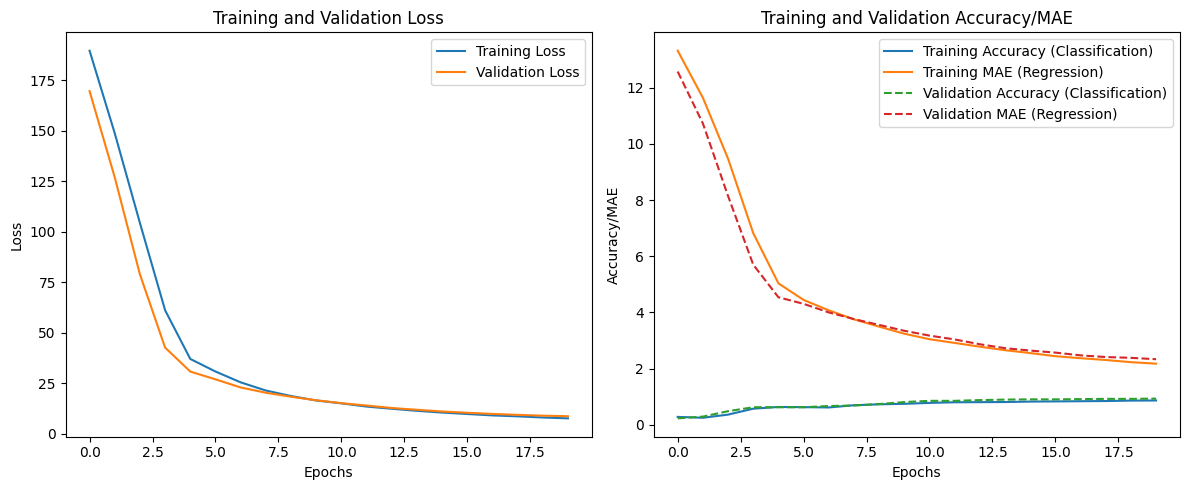

In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y_class = data.target
y_reg = data.data[:, 0]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    X_scaled, y_class, y_reg, test_size=0.2, random_state=42
)

input_layer = layers.Input(shape=(X_train.shape[1],))
x = layers.Dense(64, activation='relu')(input_layer)
x = layers.Dense(32, activation='relu')(x)


task2_output = layers.Dense(1, name='regression')(x)

model = models.Model(inputs=input_layer, outputs=[task1_output, task2_output])

model.compile(optimizer='adam',
              loss='mse',
              metrics={'classification': 'accuracy', 'regression': 'mae'})

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, {'classification': y_class_train, 'regression': y_reg_train},
                    epochs=20, validation_data=(X_test, {'classification': y_class_test, 'regression': y_reg_test}),
                    callbacks=[early_stopping])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(history.history['classification_accuracy'], label='Training Accuracy (Classification)')
axs[1].plot(history.history['regression_mae'], label='Training MAE (Regression)')
axs[1].plot(history.history['val_classification_accuracy'], label='Validation Accuracy (Classification)', linestyle='--')
axs[1].plot(history.history['val_regression_mae'], label='Validation MAE (Regression)', linestyle='--')
axs[1].set_title('Training and Validation Accuracy/MAE')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy/MAE')
axs[1].legend()

plt.tight_layout()
plt.show()


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - classification_accuracy: 0.5058 - loss: 200.4517 - regression_mae: 13.7663 - val_classification_accuracy: 0.5614 - val_loss: 172.2177 - val_regression_mae: 12.8455
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - classification_accuracy: 0.4968 - loss: 158.2320 - regression_mae: 12.2290 - val_classification_accuracy: 0.5789 - val_loss: 136.1612 - val_regression_mae: 11.4076
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - classification_accuracy: 0.5199 - loss: 123.3044 - regression_mae: 10.6492 - val_classification_accuracy: 0.5175 - val_loss: 97.1578 - val_regression_mae: 9.5204
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - classification_accuracy: 0.5292 - loss: 91.3948 - regression_mae: 8.9455 - val_classification_accuracy: 0.5263 - val_loss: 60.0161 - val_regression_mae: 7.1938
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - classification_accuracy: 0.5459 - loss: 61.3251 - regression_mae: 7.0514 - val_classifica

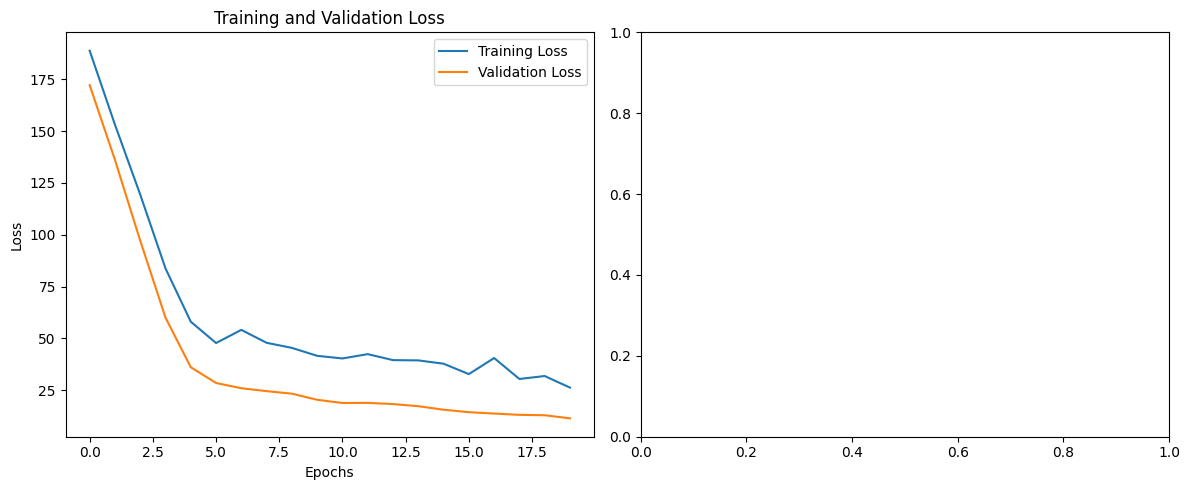

In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


data = load_breast_cancer()
X = data.data
y_class = data.target
y_reg = data.data[:, 0]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    X_scaled, y_class, y_reg, test_size=0.2, random_state=42
)

input_layer = layers.Input(shape=(X_train.shape[1],))
x = layers.Dense(64, activation='relu')(input_layer)
x = layers.Dropout(0.5)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.5)(x)

task1_output = layers.Dense(1, activation='sigmoid', name='classification')(x)

task2_output = layers.Dense(1, name='regression')(x)

model = models.Model(inputs=input_layer, outputs=[task1_output, task2_output])


model.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=1.0),
              loss='mse',
              metrics={'classification': 'accuracy', 'regression': 'mae'})


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, {'classification': y_class_train, 'regression': y_reg_train},
                    epochs=20, validation_data=(X_test, {'classification': y_class_test, 'regression': y_reg_test}),
                    callbacks=[early_stopping])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()


plt.tight_layout()
plt.show()
